# Logistic Regression Demo

In this notebook, I'm proposing a template in which you can simply load any dataset you require, perform some exploratory data analysis and data preprocessing, and get an accurate yes/no prediction on whether or not a customer will take a certain action, or any other sort of classification task. Modifications may be necessary in order to fit different types of data and or datasets.

For the purposes of this demo, I'm using the Portuguese bank dataset found on Kaggle, and sourced from this website:

https://archive.ics.uci.edu/ml/datasets/bank+marketing

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

C:\Users\William\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing the dataset

In [2]:
dataset = pd.read_csv('bank-full.csv')

In [3]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

X.shape, y.shape

((45211, 16), (45211,))

In [4]:
dataset.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


## Exploratory Data Analysis

The first steps I usually take as part of EDA are checking for null, unique, and/or duplicate values. This results in a "cleaner" dataset that should produce more accurate results when predicting classifications.

In [5]:
# Checking for null values

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


As we can see here, there are 45211 entries and 45211 non-null values, so there are no values present. However, to be sure, we can make sure by checking the number of unique values:

In [6]:
# Checking for duplicates

dataset[dataset.duplicated() == True]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target


Since nothing shows up in the above Pandas dataframe, we can be sure that there are no duplicate values.

Now, we can see that there are several features with an "object" datatype, so these need to be one-hot-encoded into numerical values.

## One-Hot-Encoding Categorical Variables

In [7]:
# First, replacing yes/no values in "Target" column with 1/0 values

dataset['Target'].replace({'yes': 1, 'no': 0}, inplace=True)

dataset = pd.get_dummies(columns=None, data=dataset)

In [8]:
dataset.head(10)

,age,balance,day,duration,campaign,pdays,previous,Target,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,35,231,5,139,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6,28,447,5,217,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7,42,2,5,380,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
8,58,121,5,50,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
9,43,593,5,55,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   Target               45211 non-null  int64
 8   job_admin.           45211 non-null  uint8
 9   job_blue-collar      45211 non-null  uint8
 10  job_entrepreneur     45211 non-null  uint8
 11  job_housemaid        45211 non-null  uint8
 12  job_management       45211 non-null  uint8
 13  job_retired          45211 non-null  uint8
 14  job_self-employed    45211 non-null  uint8
 15  job_services         45211 non-null  uint8
 16  job_student          4

## Imputing Outliers

If outliers are present in your data, they could throw off the final prediction. Here we are replacing the outliers with median values, since the median is less affected by skewed data than the mean.

In [10]:
# Imputing outliers with median values

for col in dataset.columns:
    if type(col) == 'int64':
        dataset[col][dataset[col] > dataset[col].median()] = dataset[col].median()

## Splitting the dataset into the Training set and Test set

In [11]:
dataset.head(1)

,age,balance,day,duration,campaign,pdays,previous,Target,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [12]:
columns = [col for col in dataset.columns if col != 'Target']

X = dataset[columns]
y = dataset['Target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Logistic Regression model on the Training set

In [14]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression(random_state=0)

model_log.fit(X_train, y_train)

y_pred = model_log.predict(X_test)

y_pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

## Predicting the Test set results

In [15]:
results = {'Actual': y_test, 'Predicted': y_pred}

results_df = pd.DataFrame(results)

results_df.reset_index(inplace=True, drop=True)

results_df

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
11298,0,0
11299,0,0
11300,0,0
11301,0,0


## Making the Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sb.heatmap(cm, annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1])
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

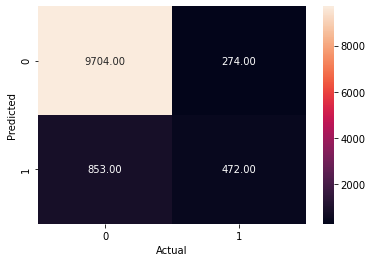

In [17]:
draw_cm(y_test, y_pred)

In [18]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy score: ", accuracy)

Accuracy score:  0.9002919578872866


### Observations based on the above heatmap:


We can see from the heatmap produced above how many true positives/true negatives and false positives/false negatives resulted from the logistic regression predictions.

1. True positives (predicted value is 1 (yes) and actual value is 1 (yes) - 472
2. True negatives (predicted value is 0 (no) and actual value is 0 (no) - 9704
3. False positives (predicted value is 1 (yes) and actual value is 0 (no) - 853
4. False negatives (predicted value is 0 (no) and actual value is 1 (yes) - 274

The accuracy score shows us that the algorithm predicted the outcome correctly 90% of the time, but this may or may not be the best measure, depending upon your classification prediction needs.

Perhaps better measures are found in the precision, recall, and F1 scores, which will be calculated below.

### Precision:

In [19]:
from sklearn.metrics import precision_score

# Calculating precision score
precision = precision_score(y_test, y_pred)

precision

0.6327077747989276

We can see above that the logistic regression algorithm received a precision score of 0.63, which is calculated by dividing the number of true positives by the sum of true positives and false positives. That is, precision is the ratio of correctly predicted positives to all positive predictions, correct and incorrect.

### Recall:

In [20]:
from sklearn.metrics import recall_score

# Calculating recall score
recall = recall_score(y_test, y_pred)

recall

0.3562264150943396

The algorithm receives a recall score of 0.35, which is calculated by dividing the number of true positives by the sum of true positives and false negatives. That is, recall is the ratio of correctly predicted positives to the sum of correctly predicted positives and incorrectly predicted negatives.

### F1 Score:

In [21]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)

f1

0.45581844519555764

The algorithm receives an f1 score of 0.45. The F1 score intends to strike a balance between precision and recall, and is calculated thusly:

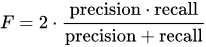

Source: https://wikimedia.org/api/rest_v1/media/math/render/svg/dd577aee2dd35c5b0e349327528a5ac606c7bbbf

### Business context:

So what does this mean for your business? For the sake of argument, let's consider a bank: if you need to know how many customers will default on a loan, the recall score would be very helpful. You want that score to be higher, because the higher it is, the more correct positive predictions and the less incorrect negative predictions the algorithm has made on whether or not a customer will default on a loan.

The precision, recall, and F1 scores are not very good. Lots of room for improvement! Next, we will attempt to improve these scores with Decision Tree, Random Forest, Bagging, and Boosting algorithms.

### Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1)
model_dt.fit(X_train, y_train)

y_pred = model_dt.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred)
prec_dt = precision_score(y_test, y_pred)
rec_dt = recall_score(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred)

### Comparison chart of scores:

In [23]:
results = pd.DataFrame({'Method': ['Logistic Regression'], 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1})

results2 = pd.DataFrame({'Method': ['Decision Tree'], 'Accuracy': acc_dt, 'Precision': prec_dt, 'Recall': rec_dt, 'F1': f1_dt})

comp_chart = pd.concat([results, results2])

In [24]:
comp_chart

,Method,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.900292,0.632708,0.356226,0.455818
0,Decision Tree,0.893126,0.559755,0.413585,0.475694


### Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(criterion='entropy', max_depth=100, random_state=1)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred)
prec_rf = precision_score(y_test, y_pred)
rec_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)

In [26]:
results3 = pd.DataFrame({'Method': ['Random Forest'], 'Accuracy': acc_rf, 'Precision': prec_rf, 'Recall': rec_rf, 'F1': f1_rf})

comp_chart = pd.concat([comp_chart, results3])

In [27]:
comp_chart

,Method,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.900292,0.632708,0.356226,0.455818
0,Decision Tree,0.893126,0.559755,0.413585,0.475694
0,Random Forest,0.900823,0.625000,0.384906,0.476413


In [28]:
from sklearn.ensemble import AdaBoostClassifier

model_ab = AdaBoostClassifier(random_state=1)
model_ab.fit(X_train, y_train)

y_pred = model_ab.predict(X_test)

acc_ab = accuracy_score(y_test, y_pred)
prec_ab = precision_score(y_test, y_pred)
rec_ab = recall_score(y_test, y_pred)
f1_ab = f1_score(y_test, y_pred)

In [29]:
results4 = pd.DataFrame({'Method': ['AdaBoost'], 'Accuracy': acc_ab, 'Precision': prec_ab, 'Recall': rec_ab, 'F1': f1_ab})

comp_chart = pd.concat([comp_chart, results4])

In [30]:
comp_chart

,Method,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.900292,0.632708,0.356226,0.455818
0,Decision Tree,0.893126,0.559755,0.413585,0.475694
0,Random Forest,0.900823,0.625000,0.384906,0.476413
0,AdaBoost,0.898346,0.604265,0.384906,0.470263


In [31]:
from sklearn.ensemble import BaggingClassifier

model_bg = BaggingClassifier(random_state=1)
model_bg.fit(X_train, y_train)

y_pred = model_bg.predict(X_test)

acc_bg = accuracy_score(y_test, y_pred)
prec_bg = precision_score(y_test, y_pred)
rec_bg = recall_score(y_test, y_pred)
f1_bg = f1_score(y_test, y_pred)

In [32]:
results5 = pd.DataFrame({'Method': ['Bagging'], 'Accuracy': acc_bg, 'Precision': prec_bg, 'Recall': rec_bg, 'F1': f1_bg})

comp_chart = pd.concat([comp_chart, results5])

## Comparison chart for all methods:

In [33]:
comp_chart

,Method,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.900292,0.632708,0.356226,0.455818
0,Decision Tree,0.893126,0.559755,0.413585,0.475694
0,Random Forest,0.900823,0.625000,0.384906,0.476413
0,AdaBoost,0.898346,0.604265,0.384906,0.470263
0,Bagging,0.895691,0.575103,0.421887,0.486722


The Random Forest method improved the recall and F1 scores slightly, but there's still room for improvement. The next step: running a grid search or random search in order to tune the hyperparameters.